# practical 2.A reflection

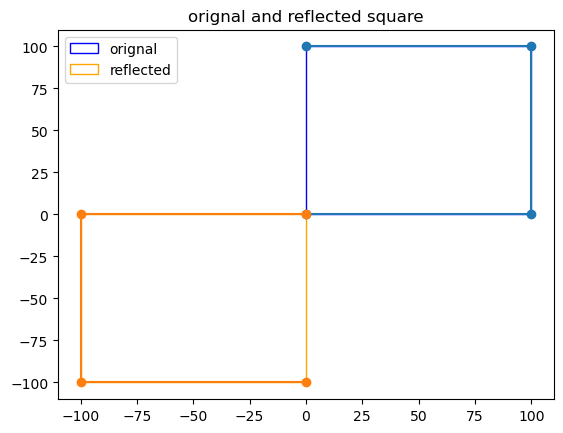

In [2]:
import numpy as np
import matplotlib.pyplot as plt
square=np.array([[0,0],[100,0],[100,100],[0,100]])
rf_matrix=np.array([[-1,0],[0,-1]])
rf_square=square@rf_matrix
plt.figure()
plt.plot(*square.T,marker='o')
plt.fill(*square.T,label='orignal',fill=False,color='blue')
plt.plot(*rf_square.T,marker='o')
plt.fill(*rf_square.T,label='reflected',fill=False,color='orange')
plt.legend()
plt.title("orignal and reflected square")
plt.show()

# 2D rotation

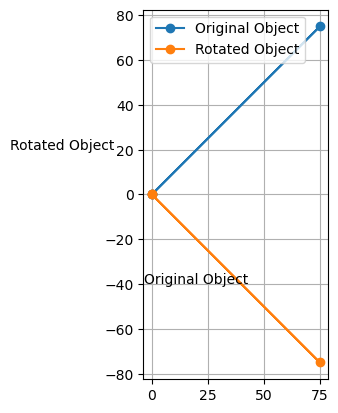

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Define the original coordinates
X = np.array([[0, 0], [75, 75], [0, 0]])
# Define the rotation matrix (90-degree counterclockwise rotation)
rotation_matrix = np.array([[0, 1], [-1, 0]])
# Apply the rotation
rotated_X = X @ rotation_matrix.T
# Plot the original object
plt.plot(*X.T, marker='o', label='Original Object')
plt.text(20, -40, "Original Object", ha='center')

# Plot the rotated object
plt.plot(*rotated_X.T, marker='o', label='Rotated Object')
plt.text(-40, 20, "Rotated Object", ha='center')

# Style and show plot
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# 2D Scaling

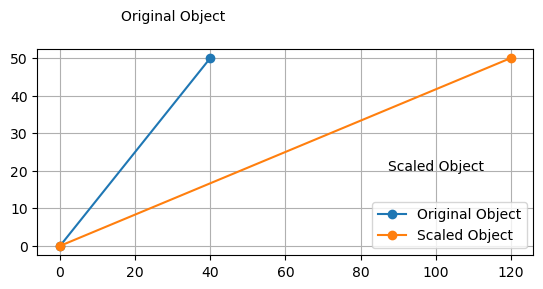

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Define original points
points = np.array([[0, 0], [40, 50]])

# Define scaling matrix (scaling X by 3 and Y by 1)
scaling_matrix = np.array([[3, 0], [0, 1]])

# Apply the scaling transformation
scaled_points = points @ scaling_matrix.T

# Plot original object
plt.plot(*points.T, marker='o', label="Original Object")
plt.text(30, 60, "Original Object", ha='center')

# Plot scaled object
plt.plot(*scaled_points.T, marker='o', label="Scaled Object")
plt.text(100, 20, "Scaled Object", ha='center')

# Style and show plot
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# 2D Shearing

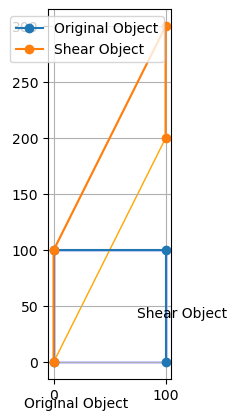

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original square points
square = np.array([[0, 0], [0, 100], [100, 100], [100, 0]])

# Define shear matrix (applies shear on the x-axis)
shear_matrix = np.array([[1, 0], [2, 1]])

# Apply the shear transformation
sheared_square = square @ shear_matrix.T

# Plot the original square
plt.plot(*square.T, marker='o', label='Original Object')
plt.fill(*square.T, edgecolor='blue', fill=False)
plt.text(20, -40, "Original Object", ha='center')

# Plot the sheared square
plt.plot(*sheared_square.T, marker='o', label='Shear Object')
plt.fill(*sheared_square.T, edgecolor='orange', fill=False)
plt.text(115, 40, "Shear Object", ha='center')

# Style and show plot
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# 2D translation 

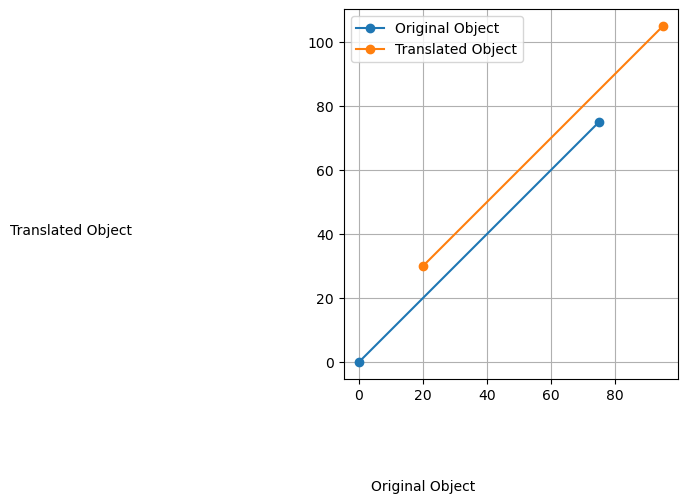

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original points (square)
original_points = np.array([[0, 0], [75, 75]])

# Define the translation vector
translation_vector = np.array([20, 30])

# Apply the translation
translated_points = original_points + translation_vector

# Plot original object
plt.plot(*original_points.T, marker='o', label="Original Object")
plt.text(20, -40, "Original Object", ha='center')

# Plot translated object
plt.plot(*translated_points.T, marker='o', label="Translated Object")
plt.text(-90, 40, "Translated Object", ha='center')

# Style and show plot
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# 3D othagangle projection cube

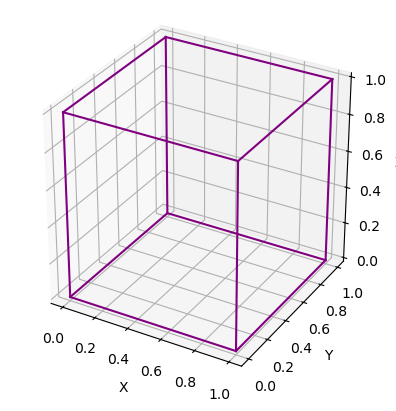

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the vertices of the cube
vertices = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                     [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Define the edges of the cube (connect the vertices)
edges = [[0, 1], [1, 2], [2, 3], [3, 0],  # Bottom square
         [4, 5], [5, 6], [6, 7], [7, 4],  # Top square
         [0, 4], [1, 5], [2, 6], [3, 7]]  # Vertical edges

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(*zip(*vertices[edge]), color="purple")

# Set labels and aspect ratio
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

plt.show()


# object recoginition using shift

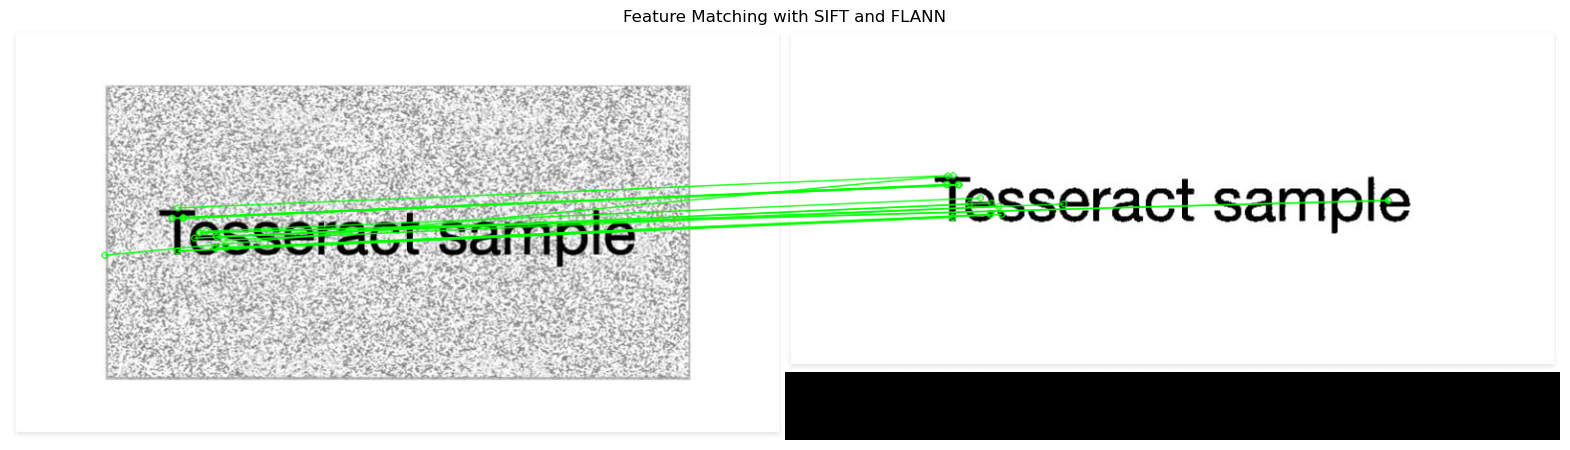

Total keypoints in Image 1: 6643
Total keypoints in Image 2: 293
Good matches found: 106
Match percentage: 36.18%


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def load_image(path, grayscale=True):
    """Load an image with error handling"""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Could not load image at {path}")
    return img

def main():
    try:
        # Load images
        img1 = load_image("/Users/apple/Desktop/unity.jpg")
        img2 = load_image("/Users/apple/Desktop/unity2.jpg")
        
        # Initialize SIFT detector
        sift = cv2.SIFT_create()
        
        # Find keypoints and descriptors
        kp1, des1 = sift.detectAndCompute(img1, None)
        kp2, des2 = sift.detectAndCompute(img2, None)
        
        # FLANN parameters (faster and often better than brute force)
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)  # Higher = more accurate but slower
        
        # FLANN based matcher
        flann = cv2.FlannBasedMatcher(index_params, search_params)
        matches = flann.knnMatch(des1, des2, k=2)
        
        # Lowe's ratio test to filter good matches
        good_matches = []
        for m, n in matches:
            if m.distance < 0.7 * n.distance:  # Adjust ratio as needed
                good_matches.append(m)
        
        # Draw matches (showing top 20 best matches)
        img_matches = cv2.drawMatches(
            img1, kp1, 
            img2, kp2, 
            good_matches[:20], 
            None, 
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
            matchColor=(0, 255, 0)  # Green color for matches
        )
        
        # Display using matplotlib for better visualization
        plt.figure(figsize=(20, 10))
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title("Feature Matching with SIFT and FLANN")
        plt.axis('off')
        plt.show()
        
        # Calculate and print matching statistics
        print(f"Total keypoints in Image 1: {len(kp1)}")
        print(f"Total keypoints in Image 2: {len(kp2)}")
        print(f"Good matches found: {len(good_matches)}")
        print(f"Match percentage: {len(good_matches)/min(len(kp1), len(kp2)):.2%}")
        
    except Exception as e:
        print(f"Error: {e}")
        return 1
    
    return 0

if __name__ == "__main__":
    main()

# hangman

In [ ]:
import random

def play_hangman():
    word = random.choice(['python', 'virtual', 'artificial', 'intelligence'])
    guessed = []
    attempts = 6

    print("Welcome to Hangman!")

    while attempts > 0:
        display = ''.join(letter if letter in guessed else '_' for letter in word)
        print(f"\nWord: {display} | Attempts left: {attempts} | Guessed: {''.join(guessed)}")
        
        guess = input("Guess a letter: ").lower()
        if guess in guessed:
            print("Already guessed.")
            continue
        
        guessed.append(guess)
        if guess in word:
            print("Good guess!")
        else:
            attempts -= 1
            print("Wrong guess.")

        if all(letter in guessed for letter in word):
            print(f"Congratulations! The word was: {word}")
            break
    else:
        print(f"Game Over! The word was: {word}")

if __name__ == "__main__":
    play_hangman()


Welcome to Hangman!

Word: ______ | Attempts left: 6 | Guessed: 


# points

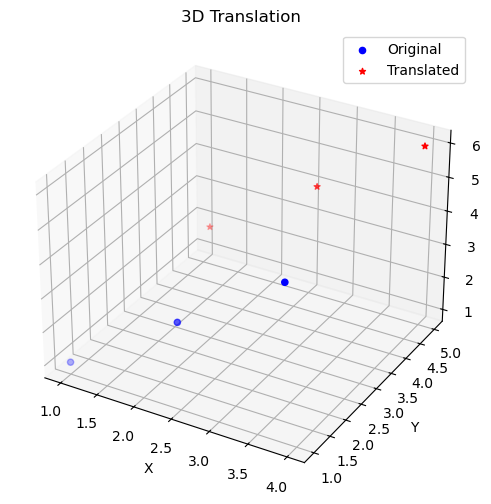

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_translated_points(points, translation):
    # Translate points
    translated_points = points + translation

    # Create a 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Original')
    # Plot translated points
    ax.scatter(translated_points[:, 0], translated_points[:, 1], translated_points[:, 2], c='r', marker='*', label='Translated')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Translation')
    ax.legend()

    plt.show()

if __name__ == "__main__":
    points = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    translation = np.array([1, 2, 3])
    plot_translated_points(points, translation)


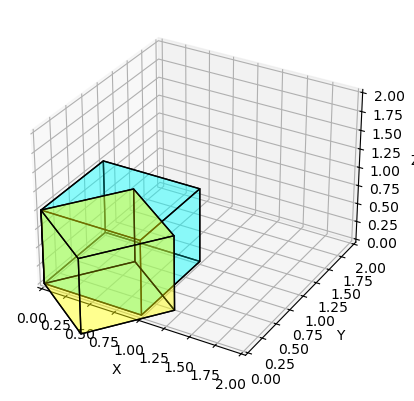

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cube(vertices, color, ax):
    """Plot a cube using the given vertices."""
    ax.add_collection3d(Poly3DCollection([
        [vertices[j] for j in [0, 1, 2, 3]],
        [vertices[j] for j in [4, 5, 6, 7]],
        [vertices[j] for j in [0, 1, 5, 4]],
        [vertices[j] for j in [2, 3, 7, 6]],
        [vertices[j] for j in [0, 3, 7, 4]],
        [vertices[j] for j in [1, 2, 6, 5]]
    ], facecolors=color, linewidths=1, edgecolors='k', alpha=0.25))

if __name__ == "__main__":
    # Define a cube's vertices
    vertices = np.array([[0, 0, 0],
                         [1, 0, 0],
                         [1, 1, 0],
                         [0, 1, 0],
                         [0, 0, 1],
                         [1, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1]])

    # Simple rotation angles (in radians)
    angles = np.array([[0.707, -0.5, 0], 
                       [0.5, 0.707, 0], 
                       [0, 0, 1]])

    # Rotate vertices
    rotated_vertices = np.dot(vertices, angles)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot original and rotated cubes
    plot_cube(vertices, 'cyan', ax)
    plot_cube(rotated_vertices, 'yellow', ax)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_zlim([0, 2])

    plt.show()


# 3d rotaion

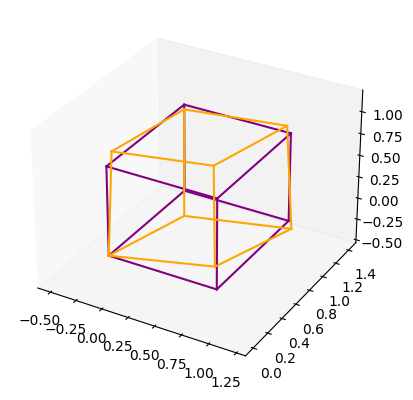

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original cube vertices
vertex = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                   [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

# Cube edges
edges = np.array([[0, 1], [1, 2], [2, 3], [3, 0],
                  [4, 5], [5, 6], [6, 7], [7, 4],
                  [0, 4], [1, 5], [2, 6], [3, 7]])
angle=np.radians(45)
sin=np.sin(angle)
cos=np.cos(angle)
x_rotaion=np.array([[1,0,0],[0,cos,-sin],[0,sin,cos]])
y_rotaion=np.array([[cos,0,sin],[0,1,0],[-sin,0,cos]])
rt=vertex@(x_rotaion@y_rotaion)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    ax.plot(*zip(*vertex[edge]), color='purple')

# Plot rotated cube
for edge in edges:
    ax.plot(*zip(*rt[edge]), color='orange')

# Disable grid for a cleaner view is addesd


plt.show()

In [2]:
import random

def play_game():
    choices = ["rock", "paper", "scissors"]
    print("Welcome to Rock, Paper, Scissors!")

    while True:
        player_choice = input("Enter your choice (rock, paper, scissors): ").lower()
        if player_choice not in choices:
            print("Invalid choice. Try again.")
            continue

        ai_choice = random.choice(choices)
        print(f"\nYou chose: {player_choice}\nAI chose: {ai_choice}")

        if player_choice == ai_choice:
            result = "It's a tie!"
        elif (player_choice == "rock" and ai_choice == "scissors") or \
             (player_choice == "paper" and ai_choice == "rock") or \
             (player_choice == "scissors" and ai_choice == "paper"):
            result = "You win!"
        else:
            result = "AI wins!"

        print(result)
        if input("\nPlay again? (yes/no): ").lower() != "yes":
            print("Thanks for playing!")
            break

if __name__ == "__main__":
    play_game()


Welcome to Rock, Paper, Scissors!



You chose: rock
AI chose: paper
AI wins!
Thanks for playing!
